# Churn Analysis Project

## A. Import libraries required and Data processing

In [1]:
# for dataframe computaion
import pandas as pd
# for vector computation
import numpy as np
# for plot
import matplotlib.pyplot as plt
import seaborn as sns
# for Statistical functions
import scipy.stats as stats  
# for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# for logistic regression
from sklearn.linear_model import LogisticRegression
# for splitting and train and test datastet randomly
from sklearn.model_selection import train_test_split
# for metrics and model evaluation
from sklearn.metrics import classification_report
from math import pi

In [113]:
#bring back the dataset
url='Dataset/mycustomerproject.csv'
mai_data_churn=pd.read_csv(url)
mai_data_churn.head(10)
mai_data_churn1=mai_data_churn

In [3]:
#determinate the area of the database
mai_data_churn.shape

(7043, 21)

**As can be seen in the cell above, the dataframe have 7043 rows and 21 columns, detailed as follows**

In [4]:
#Show informations about the database
mai_data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**And there are no null values in our dataset**

In [5]:
#Show where churn is 'Yes'
data_churning= mai_data_churn.loc[mai_data_churn['Churn'] == 'Yes']
data_churning

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


**Over a total of 7043 clients, 1869 are churn , any category combined**

Text(0.5, 1, 'Multi-Collinearity of Churning')

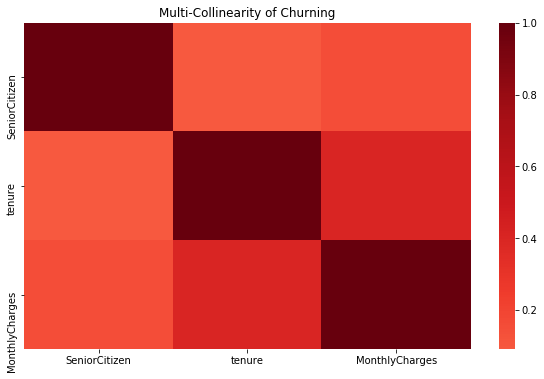

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_churning.corr(), center=0, cmap='Reds')
ax.set_title('Multi-Collinearity of Churning')

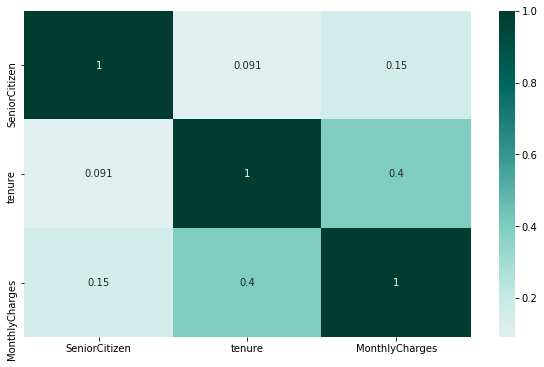

In [7]:
#Annotate each cell with the numeric value
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_churning.corr(), center=0, cmap='BrBG', annot=True)

In [8]:
#to find every categorical values
col_cat = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for col in col_cat:
    print(col, mai_data_churn[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Chur

In [9]:
churning= mai_data_churn['Churn'].value_counts().to_frame().reset_index()
churning
churning2= churning.rename(columns={'index':'Cat_Val'})
churning2

,Cat_Val,Churn
0,No,5174
1,Yes,1869


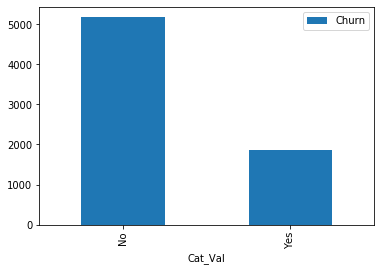

In [10]:
#number of churn in general
churning2.plot(kind='bar', x='Cat_Val',y='Churn' )

In [11]:
#see the impact of the churn
churn_impact = mai_data_churn[['Churn', 'MonthlyCharges']].groupby(['Churn']).sum()
churn_impact
churn_impact['Churn_impact'] = round((churn_impact/churn_impact.sum())*100,2)
churn_impact[:2]

,MonthlyCharges,Churn_impact
Churn,,
No,316985.75,69.5
Yes,139130.85,30.5


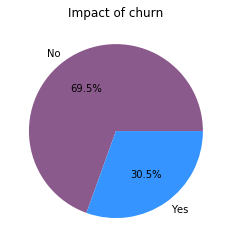

In [12]:
Churn = 'No', 'Yes'
Churning = [69.5,30.5]
colors = ['#8B5A8C','#3594FF']
plt.pie(Churning, labels=Churn, colors=colors, autopct='%1.1f%%')    
plt.title('Impact of churn')
plt.show()

**With the Churn, the company lost 30.5% of the revenue that it makes every month.**

## B. Analysis based on the Demographics

In [13]:
demographics_churn=(pd.concat([mai_data_churn[mai_data_churn.columns[1:5].to_list()],mai_data_churn['Churn']],axis=1))
demographics_churn

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes
...,...,...,...,...,...
7038,Male,0,Yes,Yes,No
7039,Female,0,Yes,Yes,No
7040,Female,0,Yes,Yes,No
7041,Male,1,Yes,No,Yes


In [14]:
#to find categorical values
col_cat = ['gender','SeniorCitizen','Partner','Dependents','Churn']
for col in col_cat:
    print(col, mai_data_churn[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Churn ['No' 'Yes']


### 1. Status

In [15]:
status_churn=demographics_churn.groupby(['Partner','Churn']).size().unstack().reset_index()
status_churn

Churn,Partner,No,Yes
0,No,2441,1200
1,Yes,2733,669


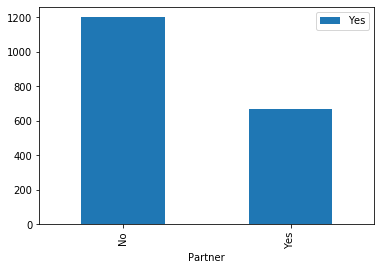

In [16]:
status_churn.plot(kind='bar',x='Partner',y='Yes')

**Clients who don't have partner churn most than clients who have**

In [17]:
status_churn['Proportion']= round ((status_churn['Yes']/1869)*100,2)
status_churn[:2]

Churn,Partner,No,Yes,Proportion
0,No,2441,1200,64.21
1,Yes,2733,669,35.79


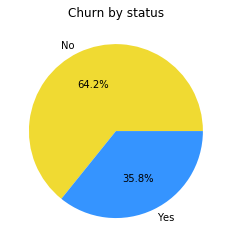

In [18]:
Partner = 'No', 'Yes'
Churning = [64.21,35.79]
colors = ['#F0DA32','#3594FF']
plt.pie(Churning, labels=Partner, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by status')
plt.show()

**Of 1869 customers who are churn, 35.79% have a partner and 64.21% do not have**

### 2, Gender

In [19]:
#number of churn by gender
gender_churn= demographics_churn.groupby(['gender','Churn']).size().unstack().reset_index()
gender_churn

Churn,gender,No,Yes
0,Female,2549,939
1,Male,2625,930


In [20]:
#percent of gender one the t0tal of clients
gender_churn['Total_gender'] = (gender_churn['No'] + gender_churn['Yes'])
gender_churn[:2]

Churn,gender,No,Yes,Total_gender
0,Female,2549,939,3488
1,Male,2625,930,3555


In [21]:
gender_churn['Proportion_gender'] = round((gender_churn['Yes'] / 1869)*100,2)
gender_churn[:2]

Churn,gender,No,Yes,Total_gender,Proportion_gender
0,Female,2549,939,3488,50.24
1,Male,2625,930,3555,49.76


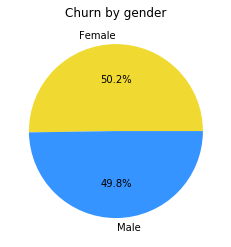

In [22]:
gender = 'Female', 'Male'
Churning = [50.24,49.76]
colors = ['#F0DA32','#3594FF']
plt.pie(Churning, labels=gender, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by gender')
plt.show()

**Of the 3,488 women, 939 are churned, and of the 3,555 men, 930 are. In other words 26.92% of the women are churn and 26.16% of the men too.   
So 50.24% of churning's population is female and 49.75% is male**

### 3. Age

In [23]:
#number of churn by age
age_churn= demographics_churn.groupby(['SeniorCitizen','Churn']).size().unstack().reset_index()
age_churn['Total'] = (age_churn['No'] + age_churn['Yes'])
age_churn[:2]
age_churn['Proportion_age'] = round((age_churn['Yes'] / 1869)*100,2)
age_churn[:2]

Churn,SeniorCitizen,No,Yes,Total,Proportion_age
0,0,4508,1393,5901,74.53
1,1,666,476,1142,25.47


In [24]:
age_percent = age_churn.append(age_churn.sum(numeric_only= True),ignore_index=True)
age_percent

Churn,SeniorCitizen,No,Yes,Total,Proportion_age
0,0.0,4508.0,1393.0,5901.0,74.53
1,1.0,666.0,476.0,1142.0,25.47
2,1.0,5174.0,1869.0,7043.0,100.00


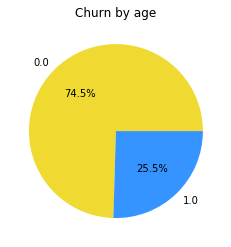

In [25]:
SeniorCitizen = '0.0', '1.0'
Churning = [74.53,25.47]
colors = ['#F0DA32','#3594FF']
plt.pie(Churning, labels=SeniorCitizen, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by age')
plt.show()

**Of the 1869 churns, 1393 are young and 476 are old. This represents 23.61% of young people and 41.68% of old people, respectively.**   
**But the churning by group of age is 74.5% for youngh people and 25.5% for old**

### 4, Dependance

In [26]:
#number of churn by dependance
dependance_churn= demographics_churn.groupby(['Dependents','Churn']).size().unstack().reset_index()
dependance_churn['Total'] = (dependance_churn['No'] + dependance_churn['Yes'])
dependance_churn[:2]
dependance_churn['Proportion'] = round((dependance_churn['Yes'] / 1869)*100,2)
dependance_churn[:2]

Churn,Dependents,No,Yes,Total,Proportion
0,No,3390,1543,4933,82.56
1,Yes,1784,326,2110,17.44


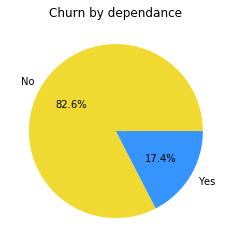

In [27]:
Dependents = 'No', 'Yes'
Churning = [82.56,17.44]
colors = ['#F0DA32','#3594FF']
plt.pie(Churning, labels=Dependents, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by dependance')
plt.show()

**82.56% of clients who are churn, aren't dependents , and the 17.44% are**

## C. Analysis on the services used

In [28]:
services_churn=(pd.concat([mai_data_churn[mai_data_churn.columns[6:15].to_list()],mai_data_churn['Churn']],axis=1))
services_churn

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,No,No phone service,DSL,Yes,No,No,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes


**There are 8 categories services**

In [29]:
#to find categorical values
col_cat = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
for col in col_cat:
    print(col, mai_data_churn[col].unique())

PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Churn ['No' 'Yes']


### 1. PhoneService

In [30]:
#number of churn by PhoneService
PhoneService_churn= services_churn.groupby(['PhoneService','Churn']).size().unstack().reset_index()
PhoneService_churn['Total'] = (PhoneService_churn['No'] + PhoneService_churn['Yes'])
PhoneService_churn[:2]
PhoneService_churn['Proportion01'] = round((PhoneService_churn['Yes'] / 1869)*100,2)
PhoneService_churn[:2]

Churn,PhoneService,No,Yes,Total,Proportion01
0,No,512,170,682,9.1
1,Yes,4662,1699,6361,90.9


In [31]:
PhoneService_percent = PhoneService_churn.append(PhoneService_churn.sum(numeric_only= True),ignore_index=True)
PhoneService_percent

Churn,PhoneService,No,Yes,Total,Proportion01
0,No,512.0,170.0,682.0,9.1
1,Yes,4662.0,1699.0,6361.0,90.9
2,NaN,5174.0,1869.0,7043.0,100.0


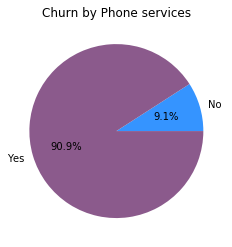

In [32]:
PhoneService = 'No', 'Yes'
Churning = [9.1, 90.9]
colors = ['#3594FF','#8B5A8C']
plt.pie(Churning, labels=PhoneService, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by Phone services')
plt.show()

***Clients who use phone services are the least likely to leave***

### 2. MultipleLines

In [33]:
#number of churn by MultipleLines
MultipleLines_churn= services_churn.groupby(['MultipleLines','Churn']).size().unstack().reset_index()
MultipleLines_churn['Total'] = (MultipleLines_churn['No'] + MultipleLines_churn['Yes'])
MultipleLines_churn[:3]
MultipleLines_churn['Proportion02'] = round((MultipleLines_churn['Yes'] / 1869)*100,2)
MultipleLines_churn[:3]

Churn,MultipleLines,No,Yes,Total,Proportion02
0,No,2541,849,3390,45.43
1,No phone service,512,170,682,9.10
2,Yes,2121,850,2971,45.48


In [34]:
MultipleLines_percent = MultipleLines_churn.append(MultipleLines_churn.sum(numeric_only= True),ignore_index=True)
MultipleLines_percent

Churn,MultipleLines,No,Yes,Total,Proportion02
0,No,2541.0,849.0,3390.0,45.43
1,No phone service,512.0,170.0,682.0,9.10
2,Yes,2121.0,850.0,2971.0,45.48
3,NaN,5174.0,1869.0,7043.0,100.01


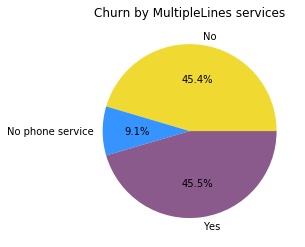

In [35]:
MultipleLines = 'No', 'No phone service', 'Yes'
Churning = [45.43, 9.10, 45.48]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=MultipleLines, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by MultipleLines services')
plt.show()

***The lowest churning percentage is for customers who no have phone service***

### 3. InternetService

In [36]:
#number of churn by InternetService
InternetService_churn= services_churn.groupby(['InternetService','Churn']).size().unstack().reset_index()
InternetService_churn['Total'] = (InternetService_churn['No'] + InternetService_churn['Yes'])
InternetService_churn[:3]
InternetService_churn['Proportion03'] = round((InternetService_churn['Yes'] / 1869)*100,2)
InternetService_churn[:3]

Churn,InternetService,No,Yes,Total,Proportion03
0,DSL,1962,459,2421,24.56
1,Fiber optic,1799,1297,3096,69.40
2,No,1413,113,1526,6.05


In [37]:
InternetService_percent = InternetService_churn.append(InternetService_churn.sum(numeric_only= True),ignore_index=True)
InternetService_percent

Churn,InternetService,No,Yes,Total,Proportion03
0,DSL,1962.0,459.0,2421.0,24.56
1,Fiber optic,1799.0,1297.0,3096.0,69.40
2,No,1413.0,113.0,1526.0,6.05
3,NaN,5174.0,1869.0,7043.0,100.01


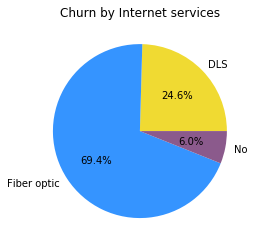

In [38]:
InternetService = 'DLS', 'Fiber optic', 'No'
Churning = [24.56, 69.40, 6.05]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=InternetService, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by Internet services')
plt.show()

***The highest churning percentage is for customers who use fiber optic for th internet services***

### 4. OnlineSecurity

In [39]:
#number of churn by OnlineSecurity
OnlineSecurity_churn= services_churn.groupby(['OnlineSecurity','Churn']).size().unstack().reset_index()
OnlineSecurity_churn['Total'] = (OnlineSecurity_churn['No'] + OnlineSecurity_churn['Yes'])
OnlineSecurity_churn[:3]
OnlineSecurity_churn['Proportion04'] = round((OnlineSecurity_churn['Yes'] / 1869)*100,2)
OnlineSecurity_churn[:3]

Churn,OnlineSecurity,No,Yes,Total,Proportion04
0,No,2037,1461,3498,78.17
1,No internet service,1413,113,1526,6.05
2,Yes,1724,295,2019,15.78


In [40]:
OnlineSecurity_percent = OnlineSecurity_churn.append(OnlineSecurity_churn.sum(numeric_only= True),ignore_index=True)
OnlineSecurity_percent

Churn,OnlineSecurity,No,Yes,Total,Proportion04
0,No,2037.0,1461.0,3498.0,78.17
1,No internet service,1413.0,113.0,1526.0,6.05
2,Yes,1724.0,295.0,2019.0,15.78
3,NaN,5174.0,1869.0,7043.0,100.00


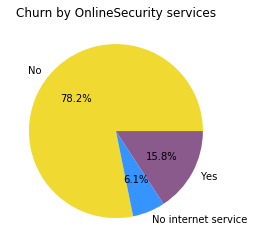

In [41]:
OnlineSecurity = 'No', 'No internet service', 'Yes'
Churning = [78.17, 6.05, 15.78]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=OnlineSecurity, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by OnlineSecurity services')
plt.show()

***Clients who have no internet service stay loyal***

### 5. DeviceProtection

In [42]:
#number of churn by DeviceProtection
DeviceProtection_churn= services_churn.groupby(['DeviceProtection','Churn']).size().unstack().reset_index()
DeviceProtection_churn['Total'] = (DeviceProtection_churn['No'] + DeviceProtection_churn['Yes'])
DeviceProtection_churn[:3]
DeviceProtection_churn['Proportion05'] = round((DeviceProtection_churn['Yes'] / 1869)*100,2)
DeviceProtection_churn[:3]

Churn,DeviceProtection,No,Yes,Total,Proportion05
0,No,1884,1211,3095,64.79
1,No internet service,1413,113,1526,6.05
2,Yes,1877,545,2422,29.16


In [43]:
DeviceProtection_percent = DeviceProtection_churn.append(DeviceProtection_churn.sum(numeric_only= True),ignore_index=True)
DeviceProtection_percent

Churn,DeviceProtection,No,Yes,Total,Proportion05
0,No,1884.0,1211.0,3095.0,64.79
1,No internet service,1413.0,113.0,1526.0,6.05
2,Yes,1877.0,545.0,2422.0,29.16
3,NaN,5174.0,1869.0,7043.0,100.00


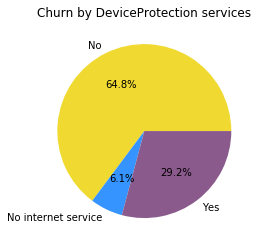

In [44]:
DeviceProtection = 'No', 'No internet service', 'Yes'
Churning = [64.79, 6.05, 29.16]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=DeviceProtection, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by DeviceProtection services')
plt.show()

***Clients who have no internet service are the least likely to stay***

### 6. TechSupport

In [45]:
#number of churn by TechSupport
TechSupport_churn= services_churn.groupby(['TechSupport','Churn']).size().unstack().reset_index()
TechSupport_churn['Total'] = (TechSupport_churn['No'] + TechSupport_churn['Yes'])
TechSupport_churn[:3]
TechSupport_churn['Proportion06'] = round((TechSupport_churn['Yes'] / 1869)*100,2)
TechSupport_churn[:3]

Churn,TechSupport,No,Yes,Total,Proportion06
0,No,2027,1446,3473,77.37
1,No internet service,1413,113,1526,6.05
2,Yes,1734,310,2044,16.59


In [46]:
TechSupport_percent = TechSupport_churn.append(TechSupport_churn.sum(numeric_only= True),ignore_index=True)
TechSupport_percent

Churn,TechSupport,No,Yes,Total,Proportion06
0,No,2027.0,1446.0,3473.0,77.37
1,No internet service,1413.0,113.0,1526.0,6.05
2,Yes,1734.0,310.0,2044.0,16.59
3,NaN,5174.0,1869.0,7043.0,100.01


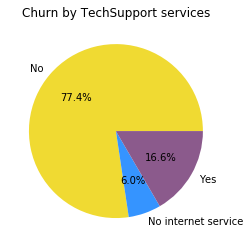

In [47]:
TechSupport = 'No', 'No internet service', 'Yes'
Churning = [77.37, 6.05, 16.59]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=TechSupport, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by TechSupport services')
plt.show()

***Clients who don't use TechSupport services are the least likely to leave
(churning=77.4%)***

### 7. StreamingTV

In [48]:
#number of churn by StreamingTV
StreamingTV_churn= services_churn.groupby(['StreamingTV','Churn']).size().unstack().reset_index()
StreamingTV_churn['Total'] = (StreamingTV_churn['No'] + StreamingTV_churn['Yes'])
StreamingTV_churn[:3]
StreamingTV_churn['Proportion07'] = round((StreamingTV_churn['Yes'] / 1869)*100,2)
StreamingTV_churn[:3]

Churn,StreamingTV,No,Yes,Total,Proportion07
0,No,1868,942,2810,50.40
1,No internet service,1413,113,1526,6.05
2,Yes,1893,814,2707,43.55


In [49]:
StreamingTV_percent = StreamingTV_churn.append(StreamingTV_churn.sum(numeric_only= True),ignore_index=True)
StreamingTV_percent

Churn,StreamingTV,No,Yes,Total,Proportion07
0,No,1868.0,942.0,2810.0,50.40
1,No internet service,1413.0,113.0,1526.0,6.05
2,Yes,1893.0,814.0,2707.0,43.55
3,NaN,5174.0,1869.0,7043.0,100.00


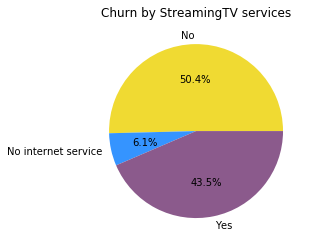

In [50]:
StreamingTV = 'No', 'No internet service', 'Yes'
Churning = [50.40, 6.05, 43.55]
colors = ['#F0DA32','#3594FF','#8B5A8C']
plt.pie(Churning, labels=StreamingTV, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by StreamingTV services')
plt.show()

***Clients who have no internet service are the least likely to stay***

### 8. StreamingMovies

In [51]:
#number of churn by StreamingMovies
StreamingMovies_churn= services_churn.groupby(['StreamingMovies','Churn']).size().unstack().reset_index()
StreamingMovies_churn['Total'] = (StreamingMovies_churn['No'] + StreamingMovies_churn['Yes'])
StreamingMovies_churn[:3]
StreamingMovies_churn['Proportion08'] = round((StreamingMovies_churn['Yes'] / 1869)*100,2)
StreamingMovies_churn[:3]

Churn,StreamingMovies,No,Yes,Total,Proportion08
0,No,1847,938,2785,50.19
1,No internet service,1413,113,1526,6.05
2,Yes,1914,818,2732,43.77


In [52]:
StreamingMovies_percent = StreamingMovies_churn.append(StreamingMovies_churn.sum(numeric_only= True),ignore_index=True)
StreamingMovies_percent

Churn,StreamingMovies,No,Yes,Total,Proportion08
0,No,1847.0,938.0,2785.0,50.19
1,No internet service,1413.0,113.0,1526.0,6.05
2,Yes,1914.0,818.0,2732.0,43.77
3,NaN,5174.0,1869.0,7043.0,100.01


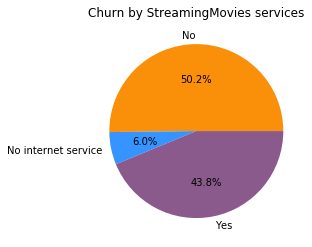

In [53]:
StreamingMovies = 'No', 'No internet service', 'Yes'
Churning = [50.19, 6.05, 43.77]
colors = ['#FA8F0A','#3594FF','#8B5A8C']
plt.pie(Churning, labels=StreamingMovies, colors=colors, autopct='%1.1f%%')    
plt.title('Churn by StreamingMovies services')
plt.show()

***Clients who have no internet service are the least likely to stay***

## D. Analysis on the Billing information

In [54]:
BillingInformation_churn=(pd.concat([mai_data_churn[mai_data_churn.columns[15:20].to_list()],mai_data_churn['Churn']],axis=1))
BillingInformation_churn

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,One year,No,Mailed check,56.95,1889.5,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,1990.5,No
7039,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [55]:
#to find categorical values
col_cat = ['Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for col in col_cat:
    print(col, mai_data_churn[col].unique())

Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


### 1. Contract

In [56]:
#number of churn by kind of contract
contract_churn= BillingInformation_churn.groupby(['Contract','Churn']).size().unstack().reset_index()
contract_churn['Total'] = (contract_churn['No'] + contract_churn['Yes'])
contract_churn[:3]
contract_churn['Proportion'] = round((contract_churn['Yes'] / 1869)*100,2)
contract_churn[:3]

Churn,Contract,No,Yes,Total,Proportion
0,Month-to-month,2220,1655,3875,88.55
1,One year,1307,166,1473,8.88
2,Two year,1647,48,1695,2.57


<function matplotlib.pyplot.show(*args, **kw)>

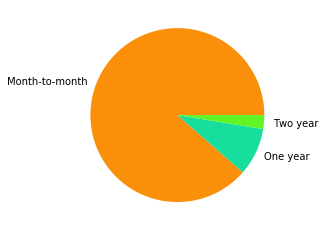

In [57]:
Contract = 'Month-to-month', 'One year','Two year'
Churning = [88.55, 8.88,2.57]
colors = ['#FA8F0A','#18DE9D','#61F527']
plt.pie(Churning, labels=Contract, colors=colors)
plt.show

***Customers with a monthly contract are those with the highest churn percentage(88.55%). Those with a two-year contract are the most loyal(2.57% of churning)***

***The annual contract policy is clearly better for the company***

### 2.PaperlessBilling

In [58]:
#number of churn by kind of PaperlessBilling
PaperlessBilling_churn= BillingInformation_churn.groupby(['PaperlessBilling','Churn']).size().unstack().reset_index()
PaperlessBilling_churn['Total'] = (PaperlessBilling_churn['No'] + PaperlessBilling_churn['Yes'])
PaperlessBilling_churn[:2]
PaperlessBilling_churn['Proportion'] = round((PaperlessBilling_churn['Yes'] / 1869)*100,2)
PaperlessBilling_churn[:2]

Churn,PaperlessBilling,No,Yes,Total,Proportion
0,No,2403,469,2872,25.09
1,Yes,2771,1400,4171,74.91


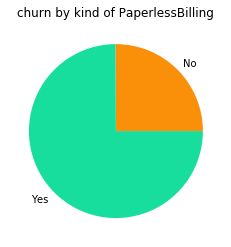

In [59]:
PaperlessBilling = 'No', 'Yes'
Churning = [25.09, 74.91]
colors = ['#FA8F0A','#18DE9D']
plt.pie(Churning, labels=PaperlessBilling, colors=colors)    
plt.title('churn by kind of PaperlessBilling')
plt.show()

***Customers who do not use the Paperless Billing policy are the least likely to stay(469 churn:25.09% pf churning).***

### 3. PaymentMethod

In [60]:
#number of churn by kind of Payment Method
PaymentMethod_churn= BillingInformation_churn.groupby(['PaymentMethod','Churn']).size().unstack().reset_index()
PaymentMethod_churn['Total'] = (PaymentMethod_churn['No'] + PaymentMethod_churn['Yes'])
PaymentMethod_churn[:4]
PaymentMethod_churn['Proportion'] = round((PaymentMethod_churn['Yes'] / 1869)*100,2)
PaymentMethod_churn[:4]

Churn,PaymentMethod,No,Yes,Total,Proportion
0,Bank transfer (automatic),1286,258,1544,13.80
1,Credit card (automatic),1290,232,1522,12.41
2,Electronic check,1294,1071,2365,57.30
3,Mailed check,1304,308,1612,16.48


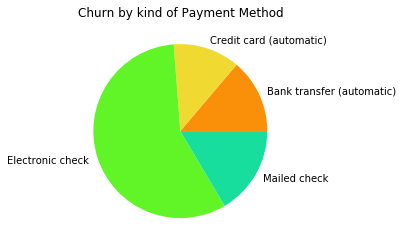

In [61]:
PaymentMethod = 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'
Churning = [13.80, 12.41, 57.30, 16.48]
colors = ['#FA8F0A','#F0DA32','#61F527','#18DE9D']
plt.pie(Churning, labels=PaymentMethod, colors=colors)    
plt.title('Churn by kind of Payment Method')
plt.show()

***Clients who use electronic check for payment method are the least likely to leave
(churning=57.30%)***

# Bonus
***How long will it take for the company to lose all its customers?  Which demographics will they lose first?***

In [62]:
#calculate how soon the company will lose all these customers
quantity = 7043
Churn_percent = 0.2654
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


***In the hypothesis where the percentage of loss of customers is fixed and that there is no new customer,the company will lose all these customers nearly in 29 month***

In [63]:
#See which demographics they will lose first

In [64]:
#Sexe
##Female
quantity1 = 3488
Churn_percent1 = 0.2692
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
##Male
quantity = 3555
Churn_percent = 0.2641
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


***In 27 month they will lost all demographics based on gender***

In [65]:
#Age
##Youngh
quantity1 = 5901
Churn_percent1 = 0.7453
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
#Old
quantity = 1142
Churn_percent = 0.2547
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


**They will lost all younght clients(7 months) before the old (24 months)**

In [66]:
#Partner
##no
quantity1 = 3641
Churn_percent1 = 0.4916
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
#Yes
quantity = 3402
Churn_percent = 0.2447
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


**They will lost all client who don't have partner in 13 months before they lost whom have partner(in 29 months)**

In [67]:
#Dependents
##No
quantity1 = 4933
Churn_percent1 = 0.8256
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
#Yes
quantity = 2110
Churn_percent = 0.1744
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


**They will lost all clients who doesn't dependent in 5 months**

### * Abstract

***The company will lost all clients whose dependency demographic is negative (no dependency) first (in 5 months)***

# Part 2

## D. Customer profile

### 1. Age

In [68]:
#The company has more young than old and they are more inclined to churn, age can use to determinate a profil.


In [141]:
selected_columns = mai_data_churn1[["SeniorCitizen","tenure","Contract","MonthlyCharges","TotalCharges","Churn"]]
new_df = selected_columns.copy()
new_df

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,Month-to-month,29.85,29.85,No
1,0,34,One year,56.95,1889.5,No
2,0,2,Month-to-month,53.85,108.15,Yes
3,0,45,One year,42.30,1840.75,No
4,0,2,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,0,24,One year,84.80,1990.5,No
7039,0,72,One year,103.20,7362.9,No
7040,0,11,Month-to-month,29.60,346.45,No
7041,1,4,Month-to-month,74.40,306.6,Yes


In [152]:
new_df1 =new_df[(new_df.Churn == 'Yes')& (new_df.SeniorCitizen == 0)]
new_df1

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn
2,0,2,Month-to-month,53.85,108.15,Yes
4,0,2,Month-to-month,70.70,151.65,Yes
5,0,8,Month-to-month,99.65,820.50,Yes
8,0,28,Month-to-month,104.80,3046.05,Yes
13,0,49,Month-to-month,103.70,5036.30,Yes
...,...,...,...,...,...,...
7011,0,4,Month-to-month,60.40,272.15,Yes
7018,0,1,Month-to-month,70.65,70.65,Yes
7021,0,12,One year,59.80,727.80,Yes
7026,0,9,Month-to-month,44.20,403.35,Yes


**From this profile on the 1863 churning 1393 customers churn**

In [212]:
#prepare data for the radar chart
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'],errors='coerce')
new_df =new_df[(new_df.Churn == 'Yes')]
new_df0 =pd.get_dummies(new_df[["SeniorCitizen","Contract","MonthlyCharges","TotalCharges"]])
new_df0 = new_df0.groupby(['SeniorCitizen']).sum()
new_df0.reset_index(level=0, inplace=True)
new_df0['SeniorCitizen'] = new_df0['SeniorCitizen'].astype(str)
new_df0

,SeniorCitizen,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,100711.25,1980521.75,1214.0,137.0,42.0
1,1,38419.60,882405.15,441.0,29.0,6.0


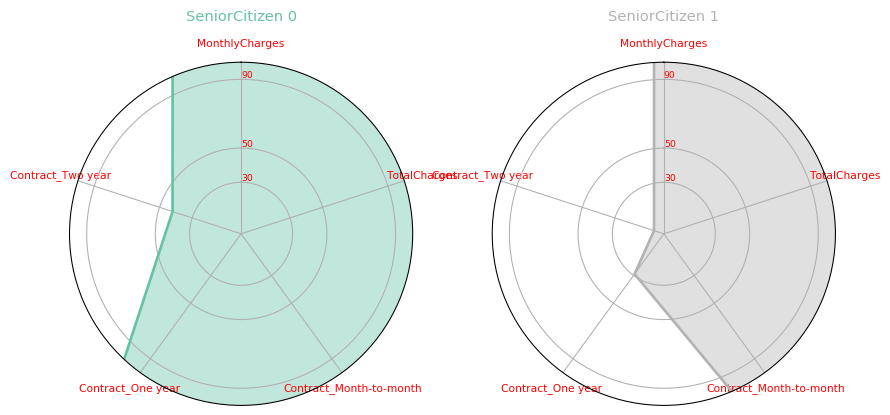

In [220]:
def make_spider( row, title, color):
# number of variable
    categories=list(new_df0)[1:]
    N = len(categories)
    #(divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
    # put the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw the axe per variable
    plt.xticks(angles[:-1], categories, color='red', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,50,90], ["30","50","90"], color="red", size=7)
    plt.ylim(0,100)
    # Ind1
    values=new_df0.loc[row].drop('SeniorCitizen').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(new_df0.index))
 
# Loop to plot
for row in range(0, len(new_df0.index)):
    make_spider( row=row, title='SeniorCitizen '+new_df0['SeniorCitizen'][row], color=my_palette(row))

### 2. Dependance

In [72]:
#From client who don't be dependents

In [221]:
selected_columns = mai_data_churn1[["Dependents","tenure","PaperlessBilling","MonthlyCharges","TotalCharges","Churn"]]
new_df = selected_columns.copy()
new_df

,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,No,1,Yes,29.85,29.85,No
1,No,34,No,56.95,1889.5,No
2,No,2,Yes,53.85,108.15,Yes
3,No,45,No,42.30,1840.75,No
4,No,2,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,Yes,24,Yes,84.80,1990.5,No
7039,Yes,72,Yes,103.20,7362.9,No
7040,Yes,11,Yes,29.60,346.45,No
7041,No,4,Yes,74.40,306.6,Yes


In [229]:
new_df1 =new_df[(new_df.Churn == 'Yes')& (new_df.Dependents == 'No')]
new_df1

,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
2,No,2,Yes,53.85,108.15,Yes
4,No,2,Yes,70.70,151.65,Yes
5,No,8,Yes,99.65,820.50,Yes
8,No,28,Yes,104.80,3046.05,Yes
13,No,49,Yes,103.70,5036.30,Yes
...,...,...,...,...,...,...
7021,No,12,Yes,59.80,727.80,Yes
7026,No,9,Yes,44.20,403.35,Yes
7032,No,1,Yes,75.75,75.75,Yes
7034,No,67,Yes,102.95,6886.25,Yes


**From this profile 1543 customers churn**

In [230]:
#prepare data for the radar chart
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'],errors='coerce')
new_df =new_df[(new_df.Churn == 'Yes')]
new_df0 =pd.get_dummies(new_df[["Dependents","PaperlessBilling","MonthlyCharges","TotalCharges"]])
new_df0 = new_df0.groupby(['Dependents']).sum()
new_df0.reset_index(level=0, inplace=True)
new_df0['Dependents'] = new_df0['Dependents'].astype(str)
new_df0

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: 'Dependents'

In [ ]:
def make_spider( row, title, color):
# number of variable
    categories=list(new_df0)[1:]
    N = len(categories)
    #(divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
    # put the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw the axe per variable
    plt.xticks(angles[:-1], categories, color='red', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="red", size=7)
    plt.ylim(0,40)
    # Ind1
    values=new_df0.loc[row].drop('Dependents').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(new_df0.index))
 
# Loop to plot
for row in range(0, len(new_df0.index)):
    make_spider( row=row, title='Dependents '+new_df0['Dependents'][row], color=my_palette(row))